# Virtual Painter

### Flow Of Program - Virtual Painter

#### Imports:
- numpy (np), cv2 (OpenCV), and deque from collections are imported.

#### Trackbar Function:
- setValues(x) is defined but doesn't do anything (print("")).

#### Trackbar Creation:
- Several trackbars are created using cv2.createTrackbar() to adjust colors.

##### Deque Initialization:
- Lists of deques are created to handle different color points.

##### Indexes and Kernel Definition:
- Indexes and a kernel (for dilation) are initialized.

##### Color Definitions:
- Colors and color indices are set for different functionalities.

#### Canvas Setup:
- A window for drawing is initialized using cv2.rectangle() and cv2.putText().

##### Webcam Setup:
- The default webcam (cap) is accessed using cv2.VideoCapture(0).

##### Main Loop:
- A continuous loop runs to read frames from the webcam.
- The frame is processed by flipping it and converting to HSV color space.
- Trackbar values are obtained for upper and lower HSV limits.
- Buttons and their functionalities are defined within the frame.
- Pointer detection and contour identification in the frame are performed.
- Actions are defined based on the detected pointers and their positions.
- Lines are drawn based on color points for different colors on the canvas and frame.
- The windows for tracking, painting, and the mask are displayed using cv2.imshow().
- The loop breaks if the 'q' key is pressed.

##### Cleanup:
- After exiting the loop, the webcam (cap) is released, and all OpenCV windows are destroyed using cv2.destroyAllWindows().

<hr>

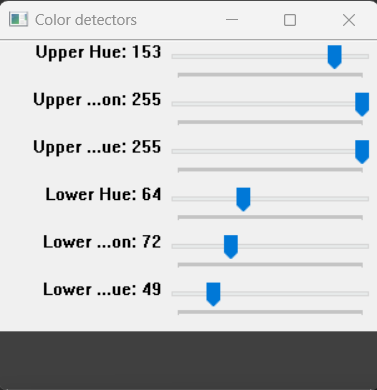

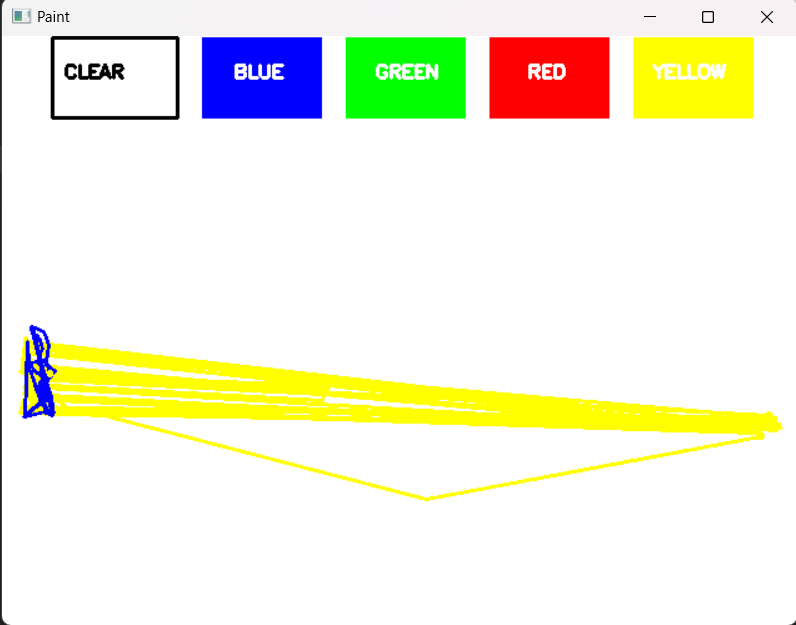

### Code Explanation (Step By Step)

In [ ]:
import numpy as np
import cv2
from collections import deque

- "import numpy" is used to import the NumPy library into your Python script or Jupyter Notebook.

- as np: This creates an alias for the NumPy library using the name np. The alias is a shorthand that simplifies referencing NumPy functions and objects in your code.

- "import cv2"  is a Python import statement that is used to bring the OpenCV library into your Python script or Jupyter Notebook.

- "from collections import deque":

- "from collections"- The collections module is a standard library module in Python that provides specialized data structures. This indicates that you want to import something from the collections module.

- import deque: This specifies that you want to import the deque class specifically from the collections module.

In [ ]:
def setValues(x):
   print("")

- "def setValues(x)" this line defines a function named setValues that takes one parameter x.
 
- Note- This function doesn't perform any meaningful computation or return any value.

### Creating the trackbars needed for adjusting the marker colour

In [ ]:
cv2.namedWindow("Color detectors")

- "cv2" Module Assuming you have imported the OpenCV library with the alias cv2, this line is using functions from the OpenCV module.

- "namedWindow()"- cv2.namedWindow("Color detectors"): This function is used to create a window with a specified name. The argument "Color detectors" is the name assigned to the window.

In [ ]:
cv2.createTrackbar("Upper Hue", "Color detectors", 153, 180,setValues)

- cv2.createTrackbar("Upper Hue", "Color detectors", 153, 180, setValues)- This function creates a trackbar in a window.

- "Upper Hue" is the name of the trackbar. This is the label that will be displayed next to the trackbar.

- "Color detectors" is the name of the window in which the trackbar will be placed.

- "153" is the initial position of the trackbar slider. It sets the default value for the trackbar.

- "180" is the maximum value that the trackbar slider can take. It defines the range of the trackbar.

- "setValues" is the callback function that will be called whenever the trackbar value changes. 

In [ ]:
cv2.createTrackbar("Upper Saturation", "Color detectors", 255, 255,setValues)
cv2.createTrackbar("Upper Value", "Color detectors", 255, 255,setValues)
cv2.createTrackbar("Lower Hue", "Color detectors", 64, 180,setValues)
cv2.createTrackbar("Lower Saturation", "Color detectors", 72, 255,setValues)
cv2.createTrackbar("Lower Value", "Color detectors", 49, 255,setValues)

Similar to the Upper Hue trackbar, this line creates a trackbar for adjusting the upper value, Lower Hue, Lower Saturation, Lower Value.

### Giving different arrays to handle colour points of different colour

In [ ]:
bpoints = [deque(maxlen=1024)]

- creates a list bpoints containing a single deque object with a maximum length of 1024 elements.

- "deque()" deque means Double-Ended Queue of data structure in Python that allows efficient, O(1), operations to add or remove elements from both ends of the queue. 

- "deque(maxlen=1024)" this creates a deque object with a maximum length (maxlen) of 1024. When the number of elements in the deque exceeds this maximum length, elements are automatically removed from the opposite end to accommodate new elements.

In [ ]:
gpoints = [deque(maxlen=1024)]
rpoints = [deque(maxlen=1024)]
ypoints = [deque(maxlen=1024)]

- Similar to the first line, this line initializes a list named gpoints, rpoints, ypoints.

- Inside this list, there is a single element, which is a deque object with a maximum length of 1024.

In [ ]:
blue_index = 0
green_index = 0
red_index = 0
yellow_index = 0

- This variable is initialized to zero.

- It may be used to mark or index points in an array associated with the color blue. When a new blue point is added to the array, blue_index might be used to determine the position where the new point should be placed.

In [ ]:
kernel = np.ones((5,5),np.uint8)

- creates a 5x5 NumPy array filled with ones.

- "np.ones" this is a NumPy function that creates an array of the specified shape and fills it with ones.

- "(5, 5)" The shape argument for np.ones is set to (5, 5), indicating that a 2D array (matrix) of size 5x5 will be created.

- "np.uint8" The dtype (data type) argument is set to np.uint8, specifying that the elements of the array are 8-bit unsigned integers. In image processing, 8-bit unsigned integers are commonly used to represent pixel values.

- "kernel" This variable is assigned the created NumPy array, effectively making it a 5x5 matrix filled with ones.

In [ ]:
colors = [(255, 0, 0), (0, 255, 0), (0, 0, 255), (0, 255, 255)]
colorIndex = 0

The provided code defines two variables, colors and colorIndex, in the context of computer graphics or image processing.

- "colors" This line initializes a list named colors

- Each element in the list is a tuple representing an RGB color. The four colors are red, green, blue, and cyan.

- (255, 0, 0) represents red (maximum intensity of red, no green, no blue).

- (0, 255, 0) represents green.

- (0, 0, 255) represents blue.

- (0, 255, 255) represents cyan (combination of green and blue).

### Code for Canvas setup

In [ ]:
paintWindow = np.zeros((471,636,3)) + 255

- The provided code initializes a NumPy array named paintWindow representing an image with dimensions 471x636

- "np.zeros((471, 636, 3))" This creates a 3D NumPy array filled with zeros. The shape of the array is specified as (471, 636, 3), indicating a 3D array with dimensions 471 (height), 636 (width), and 3 (color channels).

- "+ 255" The entire array is then added to 255. This operation effectively sets all elements in the array to 255.

In [ ]:
paintWindow = cv2.rectangle(paintWindow, (40,1), (140,65), (0,0,0), 2)

- cv2.rectangle function to draw a black rectangle on the existing paintWindow image. 

- "paintWindow" This is the existing image (NumPy array) on which the rectangle will be drawn. The rectangle will be drawn directly on this image.

- "(40, 1)" This is the coordinate of the top-left corner of the rectangle. In this case, it's (40, 1).

- "(140, 65)" This is the coordinate of the bottom-right corner of the rectangle. In this case, it's (140, 65).

- "(0, 0, 0)" This is the color of the rectangle in BGR format. Here, it's (0, 0, 0), which represents black.

- "2" This is the thickness of the rectangle border. The value 2 means that the border will have a thickness of 2 pixels.

In [ ]:
paintWindow = cv2.rectangle(paintWindow, (160,1), (255,65), colors[0], -1)

- cv2.rectangle function to draw a filled (solid) rectangle on the existing paintWindow image

- "paintWindow" This is the existing image (NumPy array) on which the filled rectangle will be drawn. The rectangle will be drawn directly on this image.

- "(160, 1)" This is the coordinate of the top-left corner of the rectangle. In this case, it's (160, 1).

- "(255, 65)" This is the coordinate of the bottom-right corner of the rectangle. In this case, it's (255, 65).

- "colors[0]" This is the color of the rectangle in RGB format. colors[0] refers to the first color in the colors list, which, based on the previous explanation, is red (255, 0, 0).

- "-1" This parameter indicates that the rectangle should be filled (solid) rather than just having a border. The value -1 specifies that the rectangle should be filled.

In [ ]:
cv2.putText(paintWindow, "CLEAR", (49, 33), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 0, 0), 2, cv2.LINE_AA)


This line of code is using the putText function from the OpenCV library to draw the text label "CLEAR" on an image represented by the variable paintWindow.


- "paintWindow" This is the image (or window) on which the text will be drawn.

- "CLEAR" This is the text that will be written on the image.

- "(49, 33)" These are the coordinates (x, y) where the baseline of the text will be located on the image. In this case, the text will start at x=49 and y=33.

- "cv2.FONT_HERSHEY_SIMPLEX" This parameter specifies the font type to be used. In this case, it's using a simple font called FONT_HERSHEY_SIMPLEX.

- "0.5" This is the font scale factor. It determines the size of the font. Here, the font size is scaled down to half of its original size.

- "(0, 0, 0)" This is the color of the text. It's represented in BGR format, where (0, 0, 0) corresponds to black. So, the text color is black.

- "2" This is the thickness of the lines used to draw the text. The text will be drawn with lines that are 2 pixels thick.

- "cv2.LINE_AA" This is the line type. cv2.LINE_AA stands for anti-aliased line type, which is used to draw smoother lines.

In [ ]:
    cv2.putText(frame, "BLUE", (185, 33), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (255, 255, 255), 2, cv2.LINE_AA)
    cv2.putText(frame, "GREEN", (298, 33), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (255, 255, 255), 2, cv2.LINE_AA)
    cv2.putText(frame, "RED", (420, 33), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (255, 255, 255), 2, cv2.LINE_AA)
    cv2.putText(frame, "YELLOW", (520, 33), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (150,150,150), 2, cv2.LINE_AA)

Each cv2.putText call is responsible for adding a different text label with specific properties.

**"GREEN" label**

- Text: "GREEN" 
- Coordinates: (298, 33)
- Font: cv2.FONT_HERSHEY_SIMPLEX
- Font scale: 0.5
- Color: White (255, 255, 255)
- Line thickness: 2
- Line type: Anti-aliased (cv2.LINE_AA)

**"RED" label**

- Text: "RED"
- Coordinates: (420, 33)
- Font: cv2.FONT_HERSHEY_SIMPLEX
- Font scale: 0.5
- Color: White (255, 255, 255)
- Line thickness: 2
- Line type: Anti-aliased (cv2.LINE_AA)

**"YELLOW" label**

- Text: "YELLOW"
- Coordinates: (520, 33)
- Font: cv2.FONT_HERSHEY_SIMPLEX
- Font scale: 0.5
- Color: Custom gray color (150, 150, 150)
- Line thickness: 2
- Line type: Anti-aliased (cv2.LINE_AA)

  ### Identifying the pointer by making its mask

In [ ]:
    Mask = cv2.inRange(hsv, Lower_hsv, Upper_hsv)
    Mask = cv2.erode(Mask, kernel, iterations=1)
    Mask = cv2.morphologyEx(Mask, cv2.MORPH_OPEN, kernel)
    Mask = cv2.dilate(Mask, kernel, iterations=1)

**Creating a Binary Mask:**

- "cv2.inRange" is used to create a binary mask by thresholding an input image (hsv in this case) based on a lower and upper color range (Lower_hsv and Upper_hsv). 

- The pixels in the resulting Mask will be set to 255 (white) if they fall within the specified range and 0 (black) otherwise.

**Erosion Operation:**

- "cv2.erode" is an erosion operation that is applied to the binary mask. 

- Erosion is a morphological operation that shrinks the white regions in the image. 

- It is typically used to reduce noise and separate objects that are close to each other.

**Morphological Opening:**

- "cv2.morphologyEx" with the cv2.MORPH_OPEN operation is used for morphological opening. 

- Opening is an operation that combines an erosion operation followed by a dilation operation. 

- It is useful for removing noise and small objects from the foreground (white regions) of the binary image.

**Dilation Operation:**

- "cv2.dilate" is a dilation operation applied to the binary mask. 

- Dilation is a morphological operation that expands the white regions in the image. 

- It is often used to close gaps between objects or to connect nearby contours.

### Find contours for the pointer after idetifying it

In [ ]:
cnts, _ = cv2.findContours(Mask.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
center = None

**cv2.findContours Function**

- "cv2.findContours" is a function in OpenCV used for finding contours in a binary image.

- The first parameter, "Mask.copy()", is the input binary image (presumably a thresholded image or mask).

- The second parameter, "cv2.RETR_EXTERNAL" , specifies the retrieval mode for contours. cv2.RETR_EXTERNAL retrieves only the extreme outer contours. 

- Contours are the boundaries of the white regions in the binary image.

- The third parameter, "cv2.CHAIN_APPROX_SIMPLE", is the contour approximation method. It compresses horizontal, diagonal, and vertical segments and leaves only their end points. This helps to save memory and speeds up the contour processing.

**Return Values**

- "cv2.findContours" returns two values: cnts and _. The variable _ is often used as a throwaway variable in Python when you are not interested in its value. 

- In this case, it's used because the function can return additional information, but it's not needed here.

**Center Initialization**

- "center = None"  initializes a variable named center to None. This variable is likely to be used to store the centroid or center of mass of the detected contours in subsequent code.

### If the contours are formed

In [ ]:
    if len(cnts) > 0:
    	# sorting the contours to find biggest 
        cnt = sorted(cnts, key = cv2.contourArea, reverse = True)[0]
        # Get the radius of the enclosing circle around the found contour
        ((x, y), radius) = cv2.minEnclosingCircle(cnt)
        # Draw the circle around the contour
        cv2.circle(frame, (int(x), int(y)), int(radius), (0, 255, 255), 2)
        # Calculating the center of the detected contour
        M = cv2.moments(cnt)
        center = (int(M['m10'] / M['m00']), int(M['m01'] / M['m00']))

**Condition Check**

- "if len(cnts) > 0:" This checks if there are any contours (cnts) detected in the binary mask. If the length of cnts is greater than zero, it means at least one contour has been found.

**sorting the contours to find the biggest**

- "cnt = sorted(cnts, key=cv2.contourArea, reverse=True)[0]" This line sorts the contours (cnts) based on their area in descending order (largest area first) using cv2.contourArea as the key function. 

- The result is stored in the variable cnt, and it represents the largest contour.

**Minimum Enclosing Circle**

- "((x, y), radius) = cv2.minEnclosingCircle(cnt)" This line calculates the minimum enclosing circle around the largest contour (cnt). The result is represented by the center (x, y) and the radius of the circle.

**Drawing the Circle**

- "cv2.circle(frame, (int(x), int(y)), int(radius), (0, 255, 255), 2)" This line draws a circle on the original image (frame) using the information obtained from the minimum enclosing circle. The center and radius are used, and the circle is drawn with a yellow color (0, 255, 255) and a line thickness of 2 pixels.

**Calculating the Center**

- "M = cv2.moments(cnt)

   center = (int(M['m10'] / M['m00']), int(M['m01'] / M['m00']))" 
   
   This part calculates the centroid (center of mass) of the largest contour using the moments of the contour (M). The m10 and m01 are the first order moments, and m00 is the zeroth order moment. The calculated center is then stored in the variable center.

### Now checking if the user wants to click on any button above the screen 

In [ ]:
if center[1] <= 65:
            if 40 <= center[0] <= 140: # Clear Button
                bpoints = [deque(maxlen=512)]
                gpoints = [deque(maxlen=512)]
                rpoints = [deque(maxlen=512)]
                ypoints = [deque(maxlen=512)]

                blue_index = 0
                green_index = 0
                red_index = 0
                yellow_index = 0

                paintWindow[67:,:,:] = 255
            elif 160 <= center[0] <= 255:
                    colorIndex = 0 # Blue
            elif 275 <= center[0] <= 370:
                    colorIndex = 1 # Green
            elif 390 <= center[0] <= 485:
                    colorIndex = 2 # Red
            elif 505 <= center[0] <= 600:
                    colorIndex = 3 # Yellow
        else :
            if colorIndex == 0:
                bpoints[blue_index].appendleft(center)
            elif colorIndex == 1:
                gpoints[green_index].appendleft(center)
            elif colorIndex == 2:
                rpoints[red_index].appendleft(center)
            elif colorIndex == 3:
                ypoints[yellow_index].appendleft(center)

**Checking Y-coordinate:**

 - if center[1] <= 65:: This condition checks whether the Y-coordinate of the detected pointer is less than or equal to 65 pixels. This corresponds to the region above the color buttons on the screen.

**Handling Clear Button:**

 - if 40 <= center[0] <= 140:: If the X-coordinate of the pointer is within the range of 40 to 140, it means the pointer is over the "CLEAR" button.
 - Inside this block:
     - bpoints = [deque(maxlen=512)]: Resets the blue color points queue.
     - Similar reset operations are done for green (gpoints), red (rpoints), and yellow (ypoints).
     - blue_index = 0, green_index = 0, red_index = 0, yellow_index = 0: Reset the indices for different colors.
     - paintWindow[67:, :, :] = 255: Fills the region below the buttons with white, essentially clearing the canvas.

**Handling Color Buttons:**

 - If the pointer is not over the "CLEAR" button, the code checks which color button the pointer is over.
 - Depending on the X-coordinate of the pointer, it sets the colorIndex to the corresponding color:
     - colorIndex = 0 for blue, colorIndex = 1 for green, colorIndex = 2 for red, colorIndex = 3 for yellow.

**Handling Drawing Points:**

 - If the pointer is not above the buttons (else block), it means the user intends to draw using the selected color.
 - Depending on the colorIndex, the current position (center) is added to the respective color's point queue (bpoints, gpoints, etc.).
 - This allows the code to keep track of the points drawn for each color.

### Append the next deques when nothing is detected to avoid messing up

In [ ]:
else:
        bpoints.append(deque(maxlen=512))
        blue_index += 1
        gpoints.append(deque(maxlen=512))
        green_index += 1
        rpoints.append(deque(maxlen=512))
        red_index += 1
        ypoints.append(deque(maxlen=512))
        yellow_index += 1

**Appending New Deques:**

 - bpoints.append(deque(maxlen=512)): Appends a new deque to the list bpoints to store blue color points. The maxlen=512 parameter sets the maximum length of the deque; once this limit is reached, the oldest points will be automatically removed.
 - Similar operations are done for green (gpoints), red (rpoints), and yellow (ypoints).

**Updating Indices:**

 - blue_index += 1: Increments the index for blue points. This index is used to access the appropriate deque in the list.
 - Similar increment operations are done for green (green_index), red (red_index), and yellow (yellow_index).

### Draw lines of all the colors on the canvas and frame 

In [ ]:
points = [bpoints, gpoints, rpoints, ypoints]
    for i in range(len(points)):
        for j in range(len(points[i])):
            for k in range(1, len(points[i][j])):
                if points[i][j][k - 1] is None or points[i][j][k] is None:
                    continue
                cv2.line(frame, points[i][j][k - 1], points[i][j][k], colors[i], 2)
                cv2.line(paintWindow, points[i][j][k - 1], points[i][j][k], colors[i], 2)

**To Draw lines of all the colors**

 - points: This is a list containing four elements, each corresponding to the deques for blue, green, red, and yellow points.

 - The outer loop (for i in range(len(points))) iterates over each color.

 - The middle loop (for j in range(len(points[i]))) iterates over each deque for the current color.

 - The inner loop (for k in range(1, len(points[i][j]))) iterates over each pair of consecutive points in the current deque.

 - The if points[i][j][k - 1] is None or points[i][j][k] is None: checks if either of the consecutive points is None. If so, it skips the current iteration, ensuring that lines are not drawn if a point is missing.

 - cv2.line(frame, points[i][j][k - 1], points[i][j][k], colors[i], 2): Draws a line on the live video frame (frame) connecting the consecutive points with the color specified in the colors list. The 2 specifies the thickness of the line.

 - cv2.line(paintWindow, points[i][j][k - 1], points[i][j][k], colors[i], 2): Draws the same line on the canvas (paintWindow).

### Show all the windows ###

In [ ]:
 cv2.imshow("Tracking", frame)
    cv2.imshow("Paint", paintWindow)
    cv2.imshow("mask",Mask)

**For Displaying windows**

 - "Tracking": Displays the live video frame (frame) with the detected pointer and the drawn lines.

 - "Paint": Displays the canvas (paintWindow) where the drawn lines are visualized. This is where the user sees the result of their drawing.

 - "mask": Displays the binary mask (Mask) that is used to identify the pointer. It shows the region of interest where the pointer is detected.

### If the 'q' key is pressed then stop the application ###

In [ ]:
if cv2.waitKey(1) & 0xFF == ord("q"):
        break

**line checks for a keypress event**

 - This block of code is checking for a key press event. cv2.waitKey(1) waits for 1 millisecond for a key event. The expression cv2.waitKey(1) & 0xFF extracts the least significant 8 bits of the result, essentially converting it to an 8-bit ASCII character. This value is then compared to the ASCII value of the character 'q' (ord("q")).

 - So, if the user presses the 'q' key, the condition becomes true, and the break statement is executed, which exits the while loop and ends the application. 

### Release the camera and all resources ###

In [ ]:
cap.release()
cv2.destroyAllWindows()

**To releases the video capture object (cap) and closes all OpenCV windows**

 - cap.release(): Releases the video capture. It's important to release the camera resource once the application is done using it. This line ensures that the camera is freed up for other applications.

 - cv2.destroyAllWindows(): Closes all OpenCV windows that are currently open. This is useful to clean up resources and close any windows that were created during the execution of the program.

### Complete Code For Showing The Output

In [1]:
import numpy as np
import cv2
from collections import deque

#default called trackbar function 
def setValues(x):
   print("")


# Creating the trackbars needed for adjusting the marker colour
cv2.namedWindow("Color detectors")
cv2.createTrackbar("Upper Hue", "Color detectors", 153, 180,setValues)
cv2.createTrackbar("Upper Saturation", "Color detectors", 255, 255,setValues)
cv2.createTrackbar("Upper Value", "Color detectors", 255, 255,setValues)
cv2.createTrackbar("Lower Hue", "Color detectors", 64, 180,setValues)
cv2.createTrackbar("Lower Saturation", "Color detectors", 72, 255,setValues)
cv2.createTrackbar("Lower Value", "Color detectors", 49, 255,setValues)


# Giving different arrays to handle colour points of different colour
bpoints = [deque(maxlen=1024)]
gpoints = [deque(maxlen=1024)]
rpoints = [deque(maxlen=1024)]
ypoints = [deque(maxlen=1024)]

# These indexes will be used to mark the points in particular arrays of specific colour
blue_index = 0
green_index = 0
red_index = 0
yellow_index = 0

#The kernel to be used for dilation purpose 
kernel = np.ones((5,5),np.uint8)

colors = [(255, 0, 0), (0, 255, 0), (0, 0, 255), (0, 255, 255)]
colorIndex = 0

# Here is code for Canvas setup
paintWindow = np.zeros((471,636,3)) + 255
paintWindow = cv2.rectangle(paintWindow, (40,1), (140,65), (0,0,0), 2)
paintWindow = cv2.rectangle(paintWindow, (160,1), (255,65), colors[0], -1)
paintWindow = cv2.rectangle(paintWindow, (275,1), (370,65), colors[1], -1)
paintWindow = cv2.rectangle(paintWindow, (390,1), (485,65), colors[2], -1)
paintWindow = cv2.rectangle(paintWindow, (505,1), (600,65), colors[3], -1)

cv2.putText(paintWindow, "CLEAR", (49, 33), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 0, 0), 2, cv2.LINE_AA)
cv2.putText(paintWindow, "BLUE", (185, 33), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (255, 255, 255), 2, cv2.LINE_AA)
cv2.putText(paintWindow, "GREEN", (298, 33), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (255, 255, 255), 2, cv2.LINE_AA)
cv2.putText(paintWindow, "RED", (420, 33), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (255, 255, 255), 2, cv2.LINE_AA)
cv2.putText(paintWindow, "YELLOW", (520, 33), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (150,150,150), 2, cv2.LINE_AA)
cv2.namedWindow('Paint', cv2.WINDOW_AUTOSIZE)


# Loading the default webcam of PC.
cap = cv2.VideoCapture(0)

# Keep looping
while True:
    # Reading the frame from the camera
    ret, frame = cap.read()
    #Flipping the frame to see same side of yours
    frame = cv2.flip(frame, 1)
    hsv = cv2.cvtColor(frame, cv2.COLOR_BGR2HSV)


    u_hue = cv2.getTrackbarPos("Upper Hue", "Color detectors")
    u_saturation = cv2.getTrackbarPos("Upper Saturation", "Color detectors")
    u_value = cv2.getTrackbarPos("Upper Value", "Color detectors")
    l_hue = cv2.getTrackbarPos("Lower Hue", "Color detectors")
    l_saturation = cv2.getTrackbarPos("Lower Saturation", "Color detectors")
    l_value = cv2.getTrackbarPos("Lower Value", "Color detectors")
    Upper_hsv = np.array([u_hue,u_saturation,u_value])
    Lower_hsv = np.array([l_hue,l_saturation,l_value])


    # Adding the colour buttons to the live frame for colour access
    frame = cv2.rectangle(frame, (40,1), (140,65), (122,122,122), -1)
    frame = cv2.rectangle(frame, (160,1), (255,65), colors[0], -1)
    frame = cv2.rectangle(frame, (275,1), (370,65), colors[1], -1)
    frame = cv2.rectangle(frame, (390,1), (485,65), colors[2], -1)
    frame = cv2.rectangle(frame, (505,1), (600,65), colors[3], -1)
    cv2.putText(frame, "CLEAR ALL", (49, 33), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (255, 255, 255), 2, cv2.LINE_AA)
    cv2.putText(frame, "BLUE", (185, 33), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (255, 255, 255), 2, cv2.LINE_AA)
    cv2.putText(frame, "GREEN", (298, 33), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (255, 255, 255), 2, cv2.LINE_AA)
    cv2.putText(frame, "RED", (420, 33), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (255, 255, 255), 2, cv2.LINE_AA)
    cv2.putText(frame, "YELLOW", (520, 33), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (150,150,150), 2, cv2.LINE_AA)


    # Identifying the pointer by making its mask
    Mask = cv2.inRange(hsv, Lower_hsv, Upper_hsv)
    Mask = cv2.erode(Mask, kernel, iterations=1)
    Mask = cv2.morphologyEx(Mask, cv2.MORPH_OPEN, kernel)
    Mask = cv2.dilate(Mask, kernel, iterations=1)

    # Find contours for the pointer after idetifying it
    cnts,_ = cv2.findContours(Mask.copy(), cv2.RETR_EXTERNAL,
    	cv2.CHAIN_APPROX_SIMPLE)
    center = None

    # Ifthe contours are formed
    if len(cnts) > 0:
    	# sorting the contours to find biggest 
        cnt = sorted(cnts, key = cv2.contourArea, reverse = True)[0]
        # Get the radius of the enclosing circle around the found contour
        ((x, y), radius) = cv2.minEnclosingCircle(cnt)
        # Draw the circle around the contour
        cv2.circle(frame, (int(x), int(y)), int(radius), (0, 255, 255), 2)
        # Calculating the center of the detected contour
        M = cv2.moments(cnt)
        center = (int(M['m10'] / M['m00']), int(M['m01'] / M['m00']))

        # Now checking if the user wants to click on any button above the screen 
        if center[1] <= 65:
            if 40 <= center[0] <= 140: # Clear Button
                bpoints = [deque(maxlen=512)]
                gpoints = [deque(maxlen=512)]
                rpoints = [deque(maxlen=512)]
                ypoints = [deque(maxlen=512)]

                blue_index = 0
                green_index = 0
                red_index = 0
                yellow_index = 0

                paintWindow[67:,:,:] = 255
            elif 160 <= center[0] <= 255:
                    colorIndex = 0 # Blue
            elif 275 <= center[0] <= 370:
                    colorIndex = 1 # Green
            elif 390 <= center[0] <= 485:
                    colorIndex = 2 # Red
            elif 505 <= center[0] <= 600:
                    colorIndex = 3 # Yellow
        else :
            if colorIndex == 0:
                bpoints[blue_index].appendleft(center)
            elif colorIndex == 1:
                gpoints[green_index].appendleft(center)
            elif colorIndex == 2:
                rpoints[red_index].appendleft(center)
            elif colorIndex == 3:
                ypoints[yellow_index].appendleft(center)
    # Append the next deques when nothing is detected to avois messing up
    else:
        bpoints.append(deque(maxlen=512))
        blue_index += 1
        gpoints.append(deque(maxlen=512))
        green_index += 1
        rpoints.append(deque(maxlen=512))
        red_index += 1
        ypoints.append(deque(maxlen=512))
        yellow_index += 1

    # Draw lines of all the colors on the canvas and frame 
    points = [bpoints, gpoints, rpoints, ypoints]
    for i in range(len(points)):
        for j in range(len(points[i])):
            for k in range(1, len(points[i][j])):
                if points[i][j][k - 1] is None or points[i][j][k] is None:
                    continue
                cv2.line(frame, points[i][j][k - 1], points[i][j][k], colors[i], 2)
                cv2.line(paintWindow, points[i][j][k - 1], points[i][j][k], colors[i], 2)

    # Show all the windows
    cv2.imshow("Tracking", frame)
    cv2.imshow("Paint", paintWindow)
    cv2.imshow("mask",Mask)

	# If the 'q' key is pressed then stop the application 
    if cv2.waitKey(1) & 0xFF == ord("q"):
        break

# Release the camera and all resources
cap.release()
cv2.destroyAllWindows()

<hr>
<hr>